# First class of Titanic

#### 작성자: 박주홍

## 문제 정의
* First Class 는 누가 타나요?
    * 타이타닉 데이터를 Decition Tree 에 적용
    * First Class 탑승자 Node 의 찾기
    * 위 Node 까지 도달하기 위한 Major Feature 찾기 

## Setting

In [1]:
import folium
import graphviz
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz

pd.set_option('display.max_rows', 10)
%matplotlib inline 

## Read Data

In [5]:
titanic = sns.load_dataset('titanic')
titanic = titanic.rename(index=lambda i: f'p_{i}')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
p_0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
p_1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
p_2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
p_3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
p_4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
p_886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
p_887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
p_888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
p_889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## Preprocessing

In [6]:
titanic_class = titanic[["sex", "embark_town", "age", "class"]]

In [7]:
sum(titanic_class["embark_town"].isnull())

2

In [8]:
titanic_class = titanic_class[(titanic_class["embark_town"].notnull()) & (titanic_class["age"].notnull())]

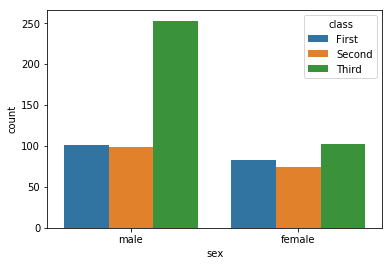

In [9]:
sns.countplot(x="sex", hue="class", data=titanic_class)

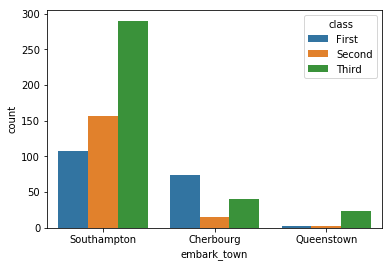

In [10]:
sns.countplot(x="embark_town", hue="class", data=titanic_class)

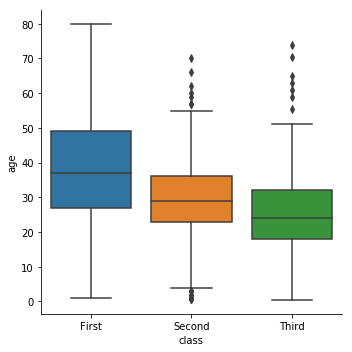

In [11]:
sns.catplot(x="class", y="age", kind="box", data=titanic_class)

In [12]:
titanic_pre = pd.concat([titanic_class[["age", "class"]], pd.get_dummies(titanic_class[["sex", "embark_town"]])], axis=1)
titanic_pre

,age,class,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
p_0,22.0,Third,0,1,0,0,1
p_1,38.0,First,1,0,1,0,0
p_2,26.0,Third,1,0,0,0,1
p_3,35.0,First,1,0,0,0,1
p_4,35.0,Third,0,1,0,0,1
...,...,...,...,...,...,...,...
p_885,39.0,Third,1,0,0,1,0
p_886,27.0,Second,0,1,0,0,1
p_887,19.0,First,1,0,0,0,1
p_889,26.0,First,0,1,1,0,0


## Modeling

In [13]:
X = titanic_pre.drop("class", axis=1)
y = titanic_pre[["class"]]

In [14]:
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X, y)
print(X.columns.values)
print(tree_clf.feature_importances_)

['age' 'sex_female' 'sex_male' 'embark_town_Cherbourg'
 'embark_town_Queenstown' 'embark_town_Southampton']
[0.66668294 0.         0.         0.33331706 0.         0.        ]


In [15]:
print(np.vstack((X.columns.values, tree_clf.feature_importances_)).T)

[['age' 0.6666829382620311]
 ['sex_female' 0.0]
 ['sex_male' 0.0]
 ['embark_town_Cherbourg' 0.333317061737969]
 ['embark_town_Queenstown' 0.0]
 ['embark_town_Southampton' 0.0]]


In [16]:
export_graphviz(
        tree_clf,
        out_file="tree.dot",
        feature_names=X.columns,
        class_names=tree_clf.classes_,
        rounded=True,
        filled=True
    )

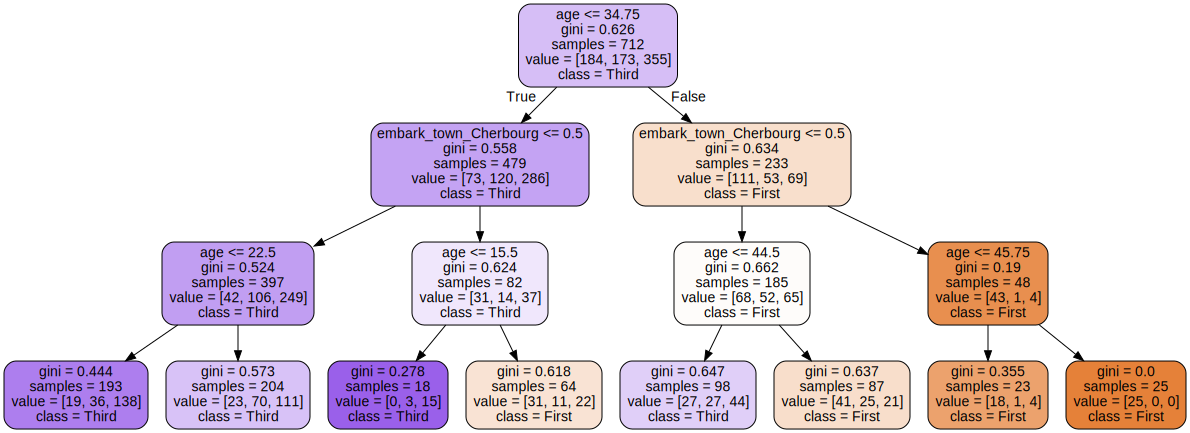

In [17]:
with open("tree.dot") as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='tree', directory='images/decision_trees', cleanup=True)
dot

![](https://upload.wikimedia.org/wikipedia/commons/5/51/Titanic_voyage_map.png)

In [18]:
folium.Map(location=(49.634357, -1.622649), zoom_start=6)